In [1]:
#### Cleaning Airbnb Listings Data using Python ####

In [2]:
# It is always recommended to perform data cleaning before using it for any analysis or dashboard development.
# First


In [6]:
# IMPORT CLEARNING TOOLS
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# LOAD AND READ DATA
listings = pd.read_csv('/Users/csuon/Documents/listings.csv') #load
print(listings.shape) #read shape of data
print(listings.dtypes) #read datatype

(4426, 18)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [8]:
listings_df = listings.select_dtypes(include = 'number')
cols_name = listings_df.columns.values

print(listings_df)
print(cols_name)

                       id    host_id  neighbourhood_group   latitude  \
0                    3781       4804                  NaN  42.364130   
1                    5506       8229                  NaN  42.328440   
2                    6695       8229                  NaN  42.328020   
3                    8789      26988                  NaN  42.358670   
4                   10811      38997                  NaN  42.351730   
...                   ...        ...                  ...        ...   
4421  1313296930035720520  373675137                  NaN  42.359190   
4422  1313804991960918153  373675137                  NaN  42.314662   
4423  1313885770001265292  212359760                  NaN  42.352864   
4424  1314048204772720842   74646031                  NaN  42.281693   
4425  1314661038454845476  373675137                  NaN  42.316209   

      longitude  price  minimum_nights  number_of_reviews  reviews_per_month  \
0    -71.029910    NaN              29                 

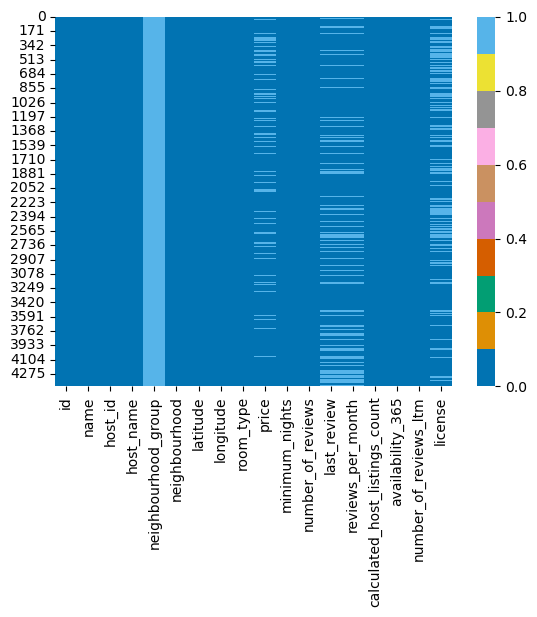

In [9]:
# MISSING DATA
# From output8, looks like there are some missing data. Let's dig further..
# Creating heatmap to show the presence of the missing values
sb.heatmap(listings.isnull(), cmap = sb.color_palette(palette='colorblind'), vmin=0, vmax=1)
plt.show()

In [13]:
# From the heatmap above, there are missing values neighborhood_group, price, last_review, reviews_per_month, and license columns
# Calculate percent of missing data in the columns

for col in listings.columns:
    missing = listings[col].isnull().mean() #calculating % of missing values
    print('{} - {}%'.format(col, round(missing*100)))
print(missing)

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 100%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 17%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 22%
reviews_per_month - 22%
calculated_host_listings_count - 0%
availability_365 - 0%
number_of_reviews_ltm - 0%
license - 34%
0.3429733393583371


In [44]:
# HANDLING MISSING DATA

# Replace missing values in last_review column with 'NA'
# Replace missing values in license column with 'NA'
# Replace missing values in reviews_per_month column with mean
# Replace missing values in price column with mean
# Drop neighbourhood_group column as 100% values are missing

In [15]:
# Replace missing values in last_review column with 'NA'
listings['last_review'] = listings['last_review'].fillna('NA')

In [16]:
# Replace missing values in license column with 'NA'
listings['license'] = listings['license'].fillna('NA')

In [24]:
# Replace missing values in reviews_per_month column with mean
avg = round(listings['reviews_per_month'].mean(), 2) # calculate the mean value and round it to 2 decimal points
print(avg)

listings['reviews_per_month'] = listings['reviews_per_month'].fillna(avg) #replace missing values with mean

1.79


In [26]:
# Replace missing values in price column with mean
pavg = round(listings['price'].mean(), 2) # calculate the mean value and round it to 2 decimal points
print(pavg)

listings['price'] = listings['price'].fillna(pavg) #replace missing values with mean

184.68


In [ ]:
# Drop neighbourhood_group column
listings = listings.drop('neighbourhood_group', axis=1)

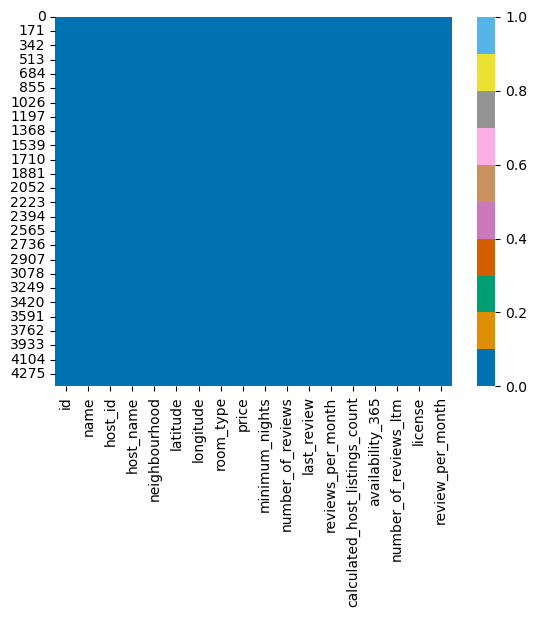

In [30]:
# Verify changes made
sb.heatmap(listings.isnull(), cmap=sb.color_palette(palette='colorblind'), vmin=0, vmax=1) 
plt.show()

In [43]:
listings.isnull() #Check if there is any more null or missing values in listings dataset

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,review_per_month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
# HANDLING OUTLIERS

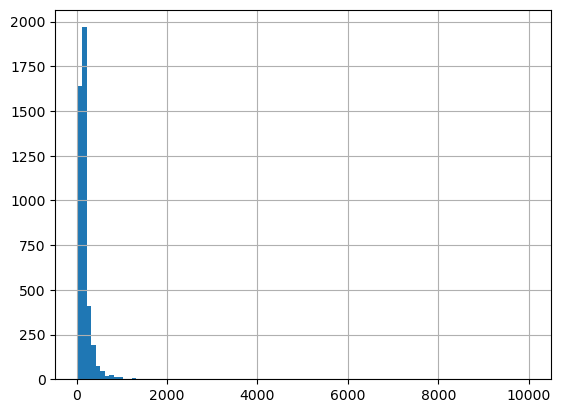

count     4426.000000
mean       184.680795
std        255.784554
min         25.000000
25%         98.000000
50%        155.000000
75%        186.000000
max      10000.000000
Name: price, dtype: float64

In [33]:
# Detect outliers in price column using histogram
listings.price.hist(bins=100)
plt.show()
# Describe basic stats of values in price column
listings['price'].describe()

In [40]:
# Drop extreme outliers
listings.drop(listings.index[listings["price"]>=9000], axis=0, inplace=True)

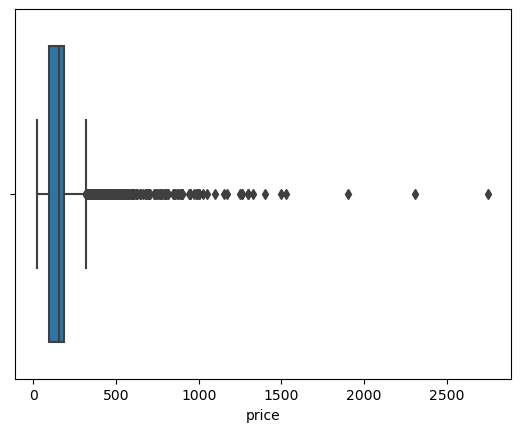

In [42]:
# View outliers in boxplot
sb.boxplot(data=listings, x='price')
plt.show()

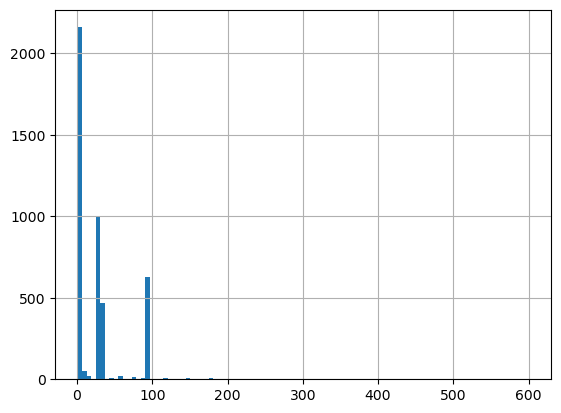

count    4424.000000
mean       26.603526
std        36.900691
min         1.000000
25%         1.000000
50%        12.500000
75%        32.000000
max       600.000000
Name: minimum_nights, dtype: float64

In [45]:
# Detect outliers in minimum_nights column
listings.minimum_nights.hist(bins=100)
plt.show()
# Describe basic stats of values in minimum_nights column
listings['minimum_nights'].describe()

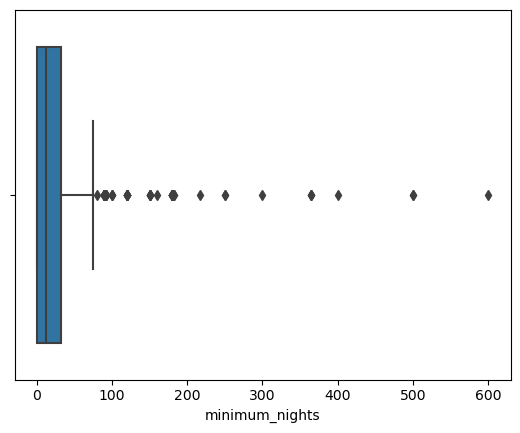

In [47]:
# View outliers in boxplot
sb.boxplot(data=listings, x='minimum_nights')
plt.show()

In [51]:
# Clean and drop outliers
listings.drop(listings.index[listings["minimum_nights"]>200], axis=0, inplace=True)

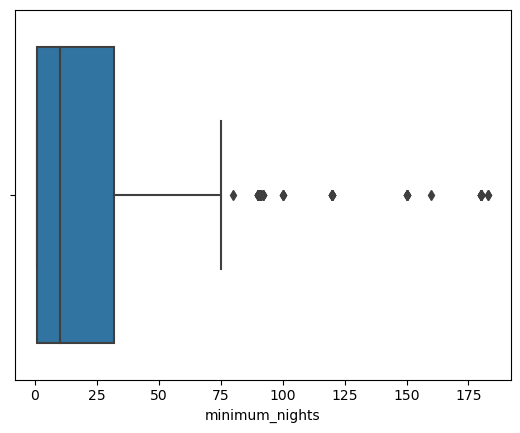

In [53]:
# Review boxplot again
sb.boxplot(data=listings, x='minimum_nights')
plt.show()

In [54]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,review_per_month
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.36413,-71.02991,Entire home/apt,184.68,29,26,2024-08-09,0.23,1,292,1,NA,0.23
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,Roxbury,42.32844,-71.09581,Entire home/apt,112.00,3,132,2024-10-19,0.69,10,148,10,STR-490093,0.69
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,Roxbury,42.32802,-71.09387,Entire home/apt,122.00,3,135,2024-11-11,0.72,10,148,8,STR-491702,0.72
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,Beacon Hill,42.35867,-71.06307,Entire home/apt,125.00,91,29,2024-05-15,0.23,4,233,1,NA,0.23
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,Back Bay,42.35173,-71.08685,Entire home/apt,110.00,91,9,2019-07-22,0.08,13,273,0,NA,0.08


In [55]:
# HANDLING SENSITIVE DATA
# Host names and ids are exposed host_name and host_id columns. For data ethic and privacy, let's sanitize this dataset by dropping these columns.
listings = listings.drop('host_id', axis=1)
listings = listings.drop('host_name', axis=1)

In [56]:
listings.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,review_per_month
0,3781,HARBORSIDE-Walk to subway,East Boston,42.36413,-71.02991,Entire home/apt,184.68,29,26,2024-08-09,0.23,1,292,1,NA,0.23
1,5506,** Fort Hill Inn Private! Minutes to center!**,Roxbury,42.32844,-71.09581,Entire home/apt,112.00,3,132,2024-10-19,0.69,10,148,10,STR-490093,0.69
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",Roxbury,42.32802,-71.09387,Entire home/apt,122.00,3,135,2024-11-11,0.72,10,148,8,STR-491702,0.72
3,8789,Curved Glass Studio/1bd facing Park,Beacon Hill,42.35867,-71.06307,Entire home/apt,125.00,91,29,2024-05-15,0.23,4,233,1,NA,0.23
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Back Bay,42.35173,-71.08685,Entire home/apt,110.00,91,9,2019-07-22,0.08,13,273,0,NA,0.08


In [57]:
# The listings dataset is sanitized and cleaned. It is ready to be used!